## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [1]:
import numpy as np
import keras
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


### Find no.of samples are there in training and test datasets

In [2]:
print(x_train.shape)
print(x_test.shape)
print('Number of samples in Training dataset: ', x_train.shape[0])
print('Number of samples in Test dataset: ', x_test.shape[0])

(60000, 28, 28)
(10000, 28, 28)
Number of samples in Training dataset:  60000
Number of samples in Test dataset:  10000


### Find dimensions of an image in the dataset

In [3]:
print('Dimensions of the image:', x_train[0].shape)

Dimensions of the image: (28, 28)


### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [4]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


### Normalize both the train and test image data from 0-255 to 0-1

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [6]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

### Import the necessary layers from keras to build the model

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape

### Build a model 

** with 2 Conv layers having `32 3*3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [8]:
# Define model
model = Sequential()

# 1st Conv Layer
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))

# 2nd Conv Layer
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))

# Fully Connected Layer
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

# Prediction Layer
model.add(Dense(10))
model.add(Activation('softmax'))

# Loss and Optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=10,
           validation_data=(x_test, y_test), callbacks=callback_list)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 202s 3ms/step - loss: 0.3733 - acc: 0.8659 - val_loss: 0.2995 - val_acc: 0.8932
Epoch 2/10
60000/60000 [==============================] - 203s 3ms/step - loss: 0.2303 - acc: 0.9154 - val_loss: 0.2488 - val_acc: 0.9114
Epoch 3/10
60000/60000 [==============================] - 231s 4ms/step - loss: 0.1669 - acc: 0.9367 - val_loss: 0.2586 - val_acc: 0.9095
Epoch 4/10
60000/60000 [==============================] - 240s 4ms/step - loss: 0.1151 - acc: 0.9562 - val_loss: 0.2744 - val_acc: 0.9100
Epoch 5/10
60000/60000 [==============================] - 238s 4ms/step - loss: 0.0776 - acc: 0.9713 - val_loss: 0.2936 - val_acc: 0.9135
Epoch 6/10
60000/60000 [==============================] - 240s 4ms/step - loss: 0.0515 - acc: 0.9816 - val_loss: 0.3470 - val_acc: 0.9104
Epoch 7/10
60000/60000 [==============================] - 234s 4ms/step - loss: 0.0366 - acc: 0.9867 - val_loss: 0.4371 - 

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [11]:
# Define model
model2 = Sequential()

# 1st Conv Layer
model2.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1)))
model2.add(Activation('relu'))

# 2nd Conv Layer
model2.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))

# Max Pooling
model2.add(MaxPool2D(pool_size=(2,2)))
    
# Dropout
model2.add(Dropout(0.25))

# Fully Connected Layer
model2.add(Flatten())
model2.add(Dense(128))
model2.add(Activation('relu'))

# Prediction Layer
model2.add(Dense(10))
model2.add(Activation('softmax'))

# Loss and Optimizer
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
# Store Training Results
early_stopping2 = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')

# Train the model
model2.fit(x_train, y_train, batch_size=32, epochs=10,
           validation_data=(x_test, y_test), callbacks=[early_stopping2])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 152s 3ms/step - loss: 0.3805 - acc: 0.8632 - val_loss: 0.2935 - val_acc: 0.8921
Epoch 2/10
60000/60000 [==============================] - 151s 3ms/step - loss: 0.2476 - acc: 0.9090 - val_loss: 0.2467 - val_acc: 0.9095
Epoch 3/10
60000/60000 [==============================] - 151s 3ms/step - loss: 0.1992 - acc: 0.9269 - val_loss: 0.2320 - val_acc: 0.9158
Epoch 4/10
60000/60000 [==============================] - 153s 3ms/step - loss: 0.1641 - acc: 0.9395 - val_loss: 0.2308 - val_acc: 0.9198
Epoch 5/10
60000/60000 [==============================] - 153s 3ms/step - loss: 0.1336 - acc: 0.9500 - val_loss: 0.2467 - val_acc: 0.9188
Epoch 6/10
60000/60000 [==============================] - 151s 3ms/step - loss: 0.1128 - acc: 0.9583 - val_loss: 0.2604 - val_acc: 0.9197
Epoch 7/10
60000/60000 [==============================] - 152s 3ms/step - loss: 0.0944 - acc: 0.9647 - val_loss: 0.2873 - 

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [12]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

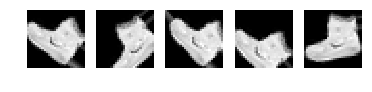

In [13]:
from matplotlib import pyplot as plt
%matplotlib inline

gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [14]:
# fits the model on batches with real-time data augmentation:
model2.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
                    steps_per_epoch=len(x_train)/32, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 148s 79ms/step - loss: 0.7413 - acc: 0.7266
Epoch 2/10
1875/1875 [==============================] - 148s 79ms/step - loss: 0.5625 - acc: 0.7891
Epoch 3/10
1875/1875 [==============================] - 146s 78ms/step - loss: 0.5107 - acc: 0.8106
Epoch 4/10
1875/1875 [==============================] - 145s 77ms/step - loss: 0.4754 - acc: 0.8212
Epoch 5/10
1875/1875 [==============================] - 147s 78ms/step - loss: 0.4556 - acc: 0.8315
Epoch 6/10
1875/1875 [==============================] - 146s 78ms/step - loss: 0.4400 - acc: 0.8372
Epoch 7/10
1875/1875 [==============================] - 144s 77ms/step - loss: 0.4270 - acc: 0.8410
Epoch 8/10
1875/1875 [==============================] - 146s 78ms/step - loss: 0.4129 - acc: 0.8467
Epoch 9/10
1875/1875 [==============================] - 147s 78ms/step - loss: 0.4087 - acc: 0.8491
Epoch 10/10
1875/1875 [==============================] - 150s 80ms/step - loss: 0.3979 - acc: 0.8518

###  Report the final train and validation accuracy

In [15]:
print('Train Accuracy: 85%')

Train Accuracy: 85%


In [16]:
loss, acc = model2.evaluate(x_test, y_test)
print('Validation Accuracy: ', acc)

10000/10000 [==============================] - 6s 611us/step
Validation Accuracy:  0.8805


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [17]:
from keras.datasets import cifar10

### **Load CIFAR10 dataset**

In [19]:
# Load/Prep the Data
(x_train, y_train_num), (x_test, y_test_num) = cifar10.load_data()

In [20]:
x_train.shape

(50000, 32, 32, 3)

In [22]:
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3).astype('float32')
x_train /= 255
x_test /= 255
y_train = np_utils.to_categorical(y_train_num, 10)
y_test = np_utils.to_categorical(y_test_num, 10)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [23]:
def data_gen(data):
    gen = datagen.flow(data, batch_size=1)
    for i in range(1, 6):
        plt.subplot(1,5,i)
        plt.axis("off")
        plt.imshow(gen.next().squeeze(), cmap='gray')
        plt.plot()
    plt.show()

### **Prepare/fit the generator.**

In [24]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

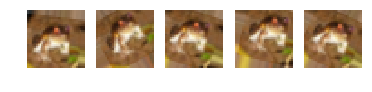

In [25]:
data_gen(x_train[0:1])